# 2. Neural Network Classifier with Keras

Using the multi-label classifier dataset from earlier exercises (categorized-comments.jsonl in the reddit folder), fit a neural network classifier using scikit-learn. Use the code found in chapter 12 of the Applied Text Analysis with Python book as a guideline. Report the accuracy, precision, recall, F1-score, and confusion matrix.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime
import pydot

from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score

from keras.utils.vis_utils import plot_model
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint


import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [2]:

def load_data(samples=None):
    '''A function to load the comments in with the option of selecting a sample size'''
    df = pd.read_json("categorized-comments.jsonl",lines=True)
    if samples != None:
        df = df.sample(round(samples))
    return df


In [3]:
    
def stemmer(ser):
    ps = PorterStemmer()
    string = ""
    for words in ser:
        string += str(ps.stem(words)) + " "
    return string.strip()


def clean_data(df):
    df['txt'] = df['txt'].str.lower()
    # Removing \n (new lines)
    df["txt"] = df['txt'].str.replace("\n", " ")

    # Removing URLS
    df['txt'] = df['txt'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
    df['txt'] = df['txt'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])

    # Removing punctuation
    df["txt"] = df['txt'].str.replace('[^\w\s]','')

    # Creating the list of stop words

    stop = set(stopwords.words('english')) 

    df['txt'] = df['txt'].str.split().apply(lambda x: [item for item in x if item not in stop])
    df['txt'] = df['txt'].apply(stemmer)
    return df


def TfidfVectorization(df):
    cv = TfidfVectorizer()
    cv_features = cv.fit_transform(df['txt'].values.astype('U')).toarray()
    feat_names = cv.get_feature_names()
    cv_targets = cv.fit_transform(df['cat'].values.astype('U')).toarray()
    target_names = cv.get_feature_names()
    return cv_features, cv_targets, feat_names, target_names

In [4]:
df= load_data(60000)
df

,cat,txt
58894,sports,&gt; Turkey eating a panther would be a better...
299925,video_games,And also as a storytelling device; not everyth...
165937,video_games,Username checks out
581848,video_games,My only Ana PoTG was in 3v3.I sleep dart a Tra...
260762,sports,This joke was almost worse than the shitpost i...
...,...,...
566043,video_games,In 16k obviously
469894,video_games,Hollow Knight please!
388932,video_games,It's getting really ridiculous. All these chan...
130661,video_games,Me eithe but bungie and most of the community ...


In [5]:
df = clean_data(df)
df

,cat,txt
58894,sports,gt turkey eat panther would better trophi woul...
299925,video_games,also storytel devic everyth rocket explos guit...
165937,video_games,usernam check
581848,video_games,ana potg 3v3i sleep dart tracer punch death
260762,sports,joke almost wors shitpost
...,...,...
566043,video_games,16k obvious
469894,video_games,hollow knight pleas
388932,video_games,get realli ridicul channel make ns video hot t...
130661,video_games,eith bungi commun go propos


In [6]:
X, y, attribute_names, target_names  = TfidfVectorization(df)

In [7]:
pd.DataFrame(X, columns = attribute_names)

,00,000,000000000000,00000000000000001,0000002,00001,00002,0001,0005,001,...,ｖａｌｕｅ,ｖａｐｏｒｗａｖｅ,ｖｉｓｕａｌ,ｗａｎｔ,ｗｅ,ｗｅｖｅ,ｗｈｅｎ,ｙｅａｈ,ｙｏｕ,ﾟヮﾟ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
pd.DataFrame(y, columns=target_names)

,science_and_technology,sports,video_games
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
59995,0.0,0.0,1.0
59996,0.0,0.0,1.0
59997,0.0,0.0,1.0
59998,0.0,0.0,1.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [10]:
model = Sequential()

model.add(Dropout(0.2, input_shape=(X_train.shape[1],)))
#model.add(Dense(500, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(200, activation='softmax'))
model.add(Dense(3, activation='softmax'))

# Compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Early stopping
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
         ModelCheckpoint(filepath='best_model_cat_comments.h5', monitor='val_loss', save_best_only=True)]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 34990)             0         
_________________________________________________________________
dense (Dense)                (None, 200)               6998200   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 603       
Total params: 6,998,803
Trainable params: 6,998,803
Non-trainable params: 0
_________________________________________________________________


In [11]:
start = datetime.datetime.now()
print("Operation Started: "+str(start.strftime("%m/%d/%y %H:%M:%S")))
history = model.fit(X_train, 
                    y_train, 
                    batch_size=128, 
                    epochs = 200,
                    callbacks=callbacks,
                    validation_data=(X_test, y_test))
end = datetime.datetime.now()
print("Operation Ended:"+str(end.strftime("%m/%d/%y %H:%M:%S")))
duration = end-start
print(f"Training Time: {str((duration.seconds // 3600)).zfill(2)}:\
{str((duration.seconds // 60)).zfill(2)}:\
{str((duration.seconds % 60)).zfill(2)}")

Operation Started: 02/15/21 17:59:30
Epoch 1/200
352/352 [==============================] - 82s 230ms/step - loss: 0.9889 - accuracy: 0.7099 - val_loss: 0.8012 - val_accuracy: 0.7126
Epoch 2/200
352/352 [==============================] - 60s 171ms/step - loss: 0.7681 - accuracy: 0.7208 - val_loss: 0.7278 - val_accuracy: 0.7126
Epoch 3/200
352/352 [==============================] - 56s 160ms/step - loss: 0.7066 - accuracy: 0.7183 - val_loss: 0.6695 - val_accuracy: 0.7126
Epoch 4/200
352/352 [==============================] - 55s 156ms/step - loss: 0.6414 - accuracy: 0.7207 - val_loss: 0.5931 - val_accuracy: 0.7543
Epoch 5/200
352/352 [==============================] - 55s 157ms/step - loss: 0.5651 - accuracy: 0.7774 - val_loss: 0.5409 - val_accuracy: 0.7986
Epoch 6/200
352/352 [==============================] - 55s 157ms/step - loss: 0.5185 - accuracy: 0.8094 - val_loss: 0.5122 - val_accuracy: 0.8133
Epoch 7/200
352/352 [==============================] - 55s 155ms/step - loss: 0.4816 - 

In [12]:
y_pred = model.predict(X_test).round()
y_pred

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [13]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

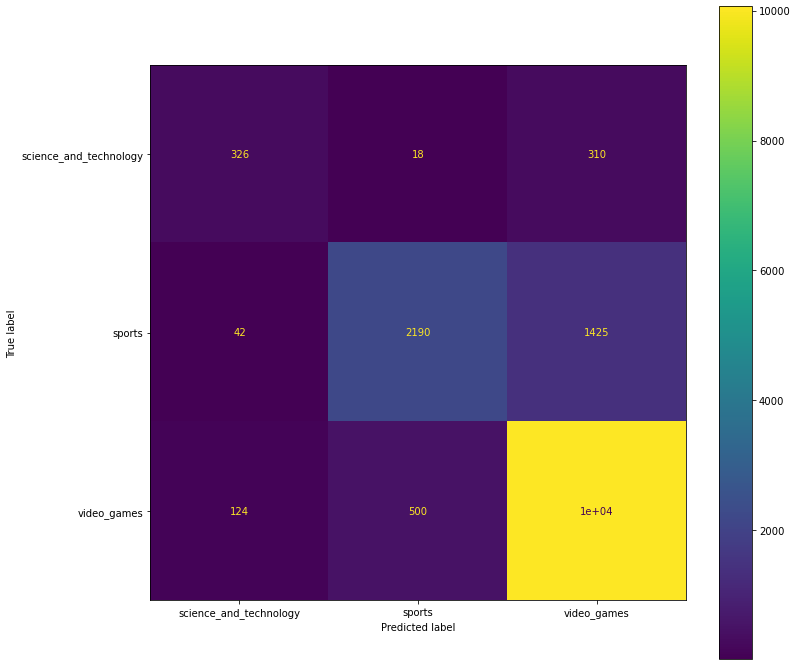

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(12, 12))
fig = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=target_names)
fig.plot(ax=ax)
plt.show()

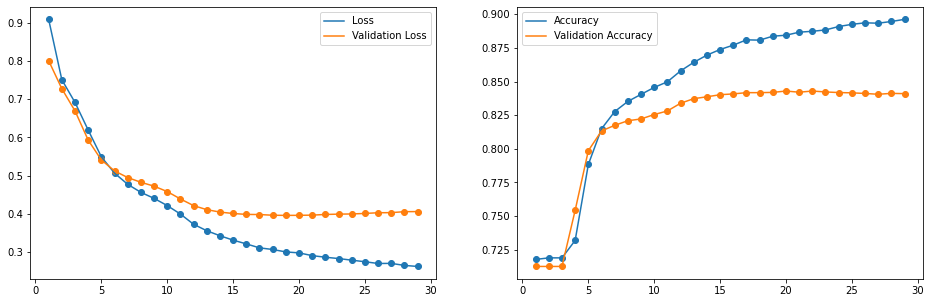

In [15]:
epochs = len(history.history['loss'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))

ax1.plot(np.arange(1,epochs+ 1),history.history['loss'], label = 'Loss') 
ax1.plot(np.arange(1,epochs+ 1),history.history['val_loss'], label = 'Validation Loss')
ax1.scatter(np.arange(1,epochs+ 1),history.history['loss']) 
ax1.scatter(np.arange(1,epochs+ 1),history.history['val_loss'])

ax2.plot(np.arange(1,epochs+ 1),history.history['accuracy'], label = 'Accuracy') 
ax2.plot(np.arange(1,epochs+ 1),history.history['val_accuracy'], label = 'Validation Accuracy')

ax2.scatter(np.arange(1,epochs+ 1),history.history['accuracy']) 
ax2.scatter(np.arange(1,epochs+ 1),history.history['val_accuracy'])

ax1.legend()
ax2.legend()
plt.show()

In [16]:
print(f"Accuracy: {np.mean(y_pred == y_test)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred,average='macro')*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')*100:.2f}%")

Accuracy: 89.42%
Precision: 83.54%
Recall: 66.28%
